In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pandas as pd

In [2]:
dfTrain = pd.read_csv('train(1).csv', parse_dates=['datetime'])
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [24]:
dfTest = pd.read_csv('test.csv', parse_dates=['datetime'])
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [3]:
dfTrain.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## 더미화

In [4]:
#계절(카테고리 형태인데 수치로 저장되어있는 경우는 더미화 함)
#1->1000
#2->0100
#4->0010
#4->0001



In [6]:
#다중공선성:독립변수들 간에 선형 독립이 아닌 경우 
#예측 모델의 일부 독립변수가 다른 독립변수와 상관관계가 높아서,
#데이터 분석하는 과정 부정적인 영향을 주게 되는 현상

In [8]:
#ex) 학업성취도와 음주사이의 관계(영향)? 회귀분석
#학업성취도(y),하루음주량(x1),혈중알콜농도(x2)
#하루음주량과 혈중알콜농도가 독립? 아님. 매우 높은 상관관계가 있음->다중공선성 존재

#교통사고량(y), 빙판길(x1), 눈(x2), 영하(x3)...   =>회귀모델x, 다중공선성 제거
                    #겨울(x4)    ==>차원축소   =>회귀모델 작성

#lg데이터전처리 pdf: 38페이지부터...참고

#다중공선성 해결?
#vif 값을 조사->10이상이면 다중공선성이 있는 것으로 간주->해당 변수를 제거(변수 선택, 하루 음주량을 선택하고 혈중 알콜농도 버림)/ 차원축소(pca)


In [9]:
#x축: temp, windspeed, humadity
#y축: count

<AxesSubplot:xlabel='humidity', ylabel='count'>

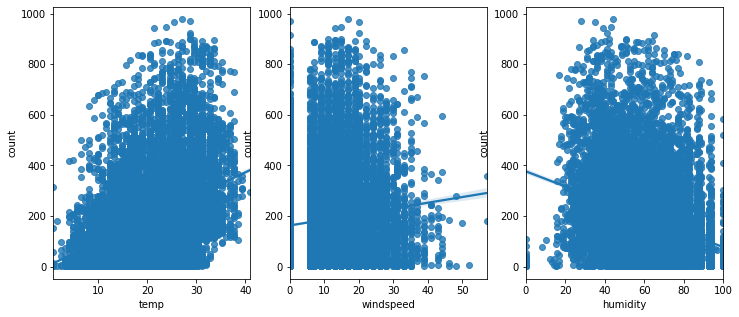

In [17]:
fig, axes=plt.subplots(ncols=3, figsize=(12,5))  #1=72pixel

tdata= pd.concat([dfTrain['count'], dfTrain['temp']], axis=1)
sns.regplot(x='temp',y='count',data=tdata, scatter=True,ax=axes[0])

wdata= pd.concat([dfTrain['count'], dfTrain['windspeed']], axis=1)
sns.regplot(x='windspeed',y='count',data=wdata, scatter=True,ax=axes[1])

hdata= pd.concat([dfTrain['count'], dfTrain['humidity']], axis=1)
sns.regplot(x='humidity',y='count',data=hdata, scatter=True,ax=axes[2])

<AxesSubplot:xlabel='windspeed', ylabel='count'>

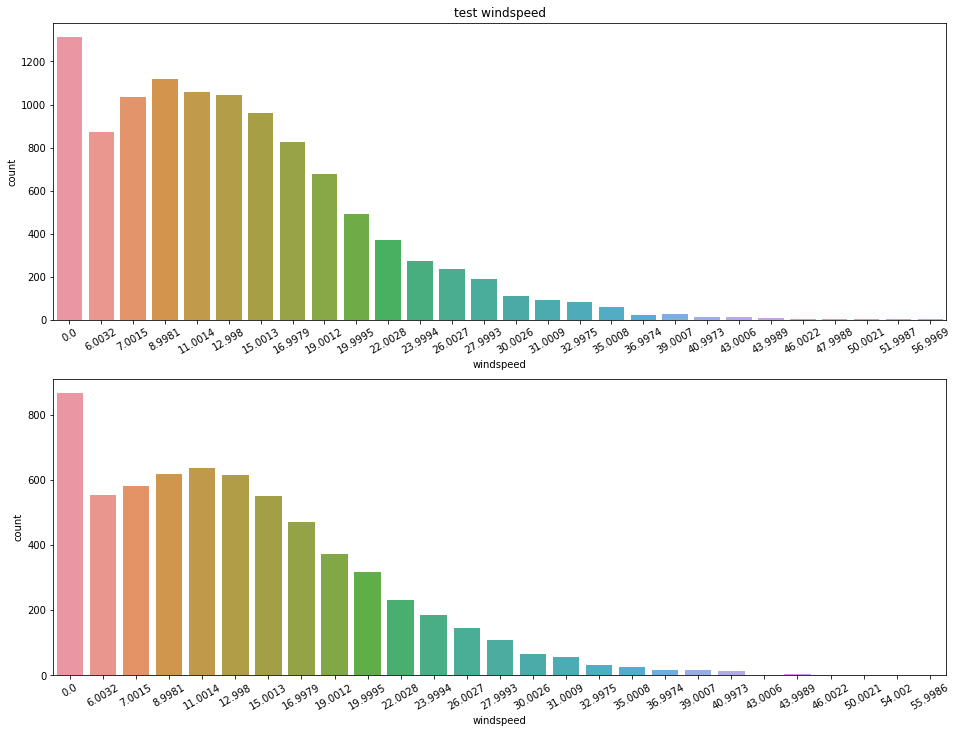

In [25]:
fig, axes = plt.subplots(nrows=2, figsize=(16,12))


plt.sca(axes[0])  #출력하고자 하는 그림은 axes=[0]
plt.xticks(rotation=30)
axes[0].set(ylabel='count',title='train windspeed')
sns.countplot(data=dfTrain, x='windspeed',ax=axes[0])
#countplot: 카테고리별로 데이터의 개수를 출력, 데이터프레임에서만 사용가능


plt.sca(axes[1])  #출력하고자 하는 그림은 axes=[0]
plt.xticks(rotation=30)
axes[0].set(ylabel='count',title='test windspeed')
sns.countplot(data=dfTest, x='windspeed',ax=axes[1])

In [26]:
#x축: year와 month 기준으로 y축: count값 출력
#2011-1~2012-12, count 


#dfTrain의 datetime에서 연도, 월 추출
#=>연도와 월을 결합한 새로운 컬럼 생성


In [30]:
def myconcat(dt):
    return '{0}-{1}'.format(dt.year, dt.month)
    

dfTrain['ym']=dfTrain['datetime'].apply(myconcat)
dfTest['ym']=dfTest['datetime'].apply(myconcat)


In [32]:
dfTrain[['datetime','ym']]
dfTest[['datetime','ym']]

,datetime,ym
0,2011-01-20 00:00:00,2011-1
1,2011-01-20 01:00:00,2011-1
2,2011-01-20 02:00:00,2011-1
3,2011-01-20 03:00:00,2011-1
4,2011-01-20 04:00:00,2011-1
...,...,...
6488,2012-12-31 19:00:00,2012-12
6489,2012-12-31 20:00:00,2012-12
6490,2012-12-31 21:00:00,2012-12
6491,2012-12-31 22:00:00,2012-12


<AxesSubplot:xlabel='ym', ylabel='count'>

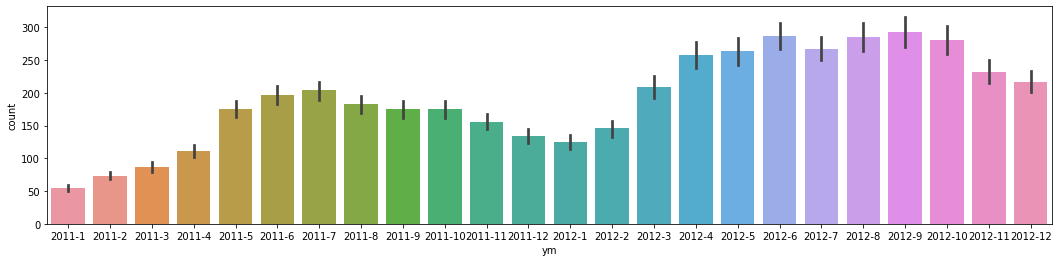

In [33]:
plt.subplots(figsize=(18,4))
sns.barplot(data=dfTrain, y='count',x='ym')

In [34]:
import numpy as np

In [46]:
def detectoutliers(df, features):
    outlierindices=[]
    for col in features:
        Q1=np.percentile(df[col],25)  #25%지점의 값(q1)
        Q3=np.percentile(df[col],75)  #75%지점의 값(q3)
        IQR=Q3-Q1
        outlierStep=IQR*1.5   #상한선과 하한선 구하는 방법
        
        outlierCol=df[(df[col]<Q1-outlierStep) | (df[col]>Q3+outlierStep)].index
        #print(outlierCol)
        outlierindices.extend(outlierCol)
    #print(outlierindices)
    oi=Counter(outlierindices)
    multipltOutliers=[k for k,v in oi.items() if v > 2]
    return multipltOutliers
    

    
    
OutliersToDrop=detectoutliers(dfTrain, ["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"])

#최소 3개 이상의 컬럼에서 outlier가 발생한 데이터의 index 번호 리스트


In [51]:
dfTrain.loc[OutliersToDrop]

dfTrain=dfTrain.drop(OutliersToDrop, axis=0).reset_index(drop=True)
dfTrain.shape

(10766, 14)

In [39]:
from collections import Counter
Counter('hello world').most_common()

[('l', 3),
 ('o', 2),
 ('h', 1),
 ('e', 1),
 (' ', 1),
 ('w', 1),
 ('r', 1),
 ('d', 1)]

In [40]:
Counter('hello world').most_common(1)

[('l', 3)]

In [41]:
Counter('hello world').items()

dict_items([('h', 1), ('e', 1), ('l', 3), ('o', 2), (' ', 1), ('w', 1), ('r', 1), ('d', 1)])

In [62]:
dfTrain['dayofweek']=dfTrain['datetime'].dt.dayofweek   #요일추출
dfTest['dayofweek']=dfTest['datetime'].dt.dayofweek

In [63]:
dfTrain['year']=dfTrain['datetime'].dt.year
dfTrain['month']=dfTrain['datetime'].dt.month
dfTrain['day']=dfTrain['datetime'].dt.day
dfTrain['hour']=dfTrain['datetime'].dt.hour

In [64]:
dfTest['year']=dfTrain['datetime'].dt.year
dfTest['month']=dfTrain['datetime'].dt.month
dfTest['day']=dfTrain['datetime'].dt.day
dfTest['hour']=dfTrain['datetime'].dt.hour

<AxesSubplot:xlabel='hour', ylabel='count'>

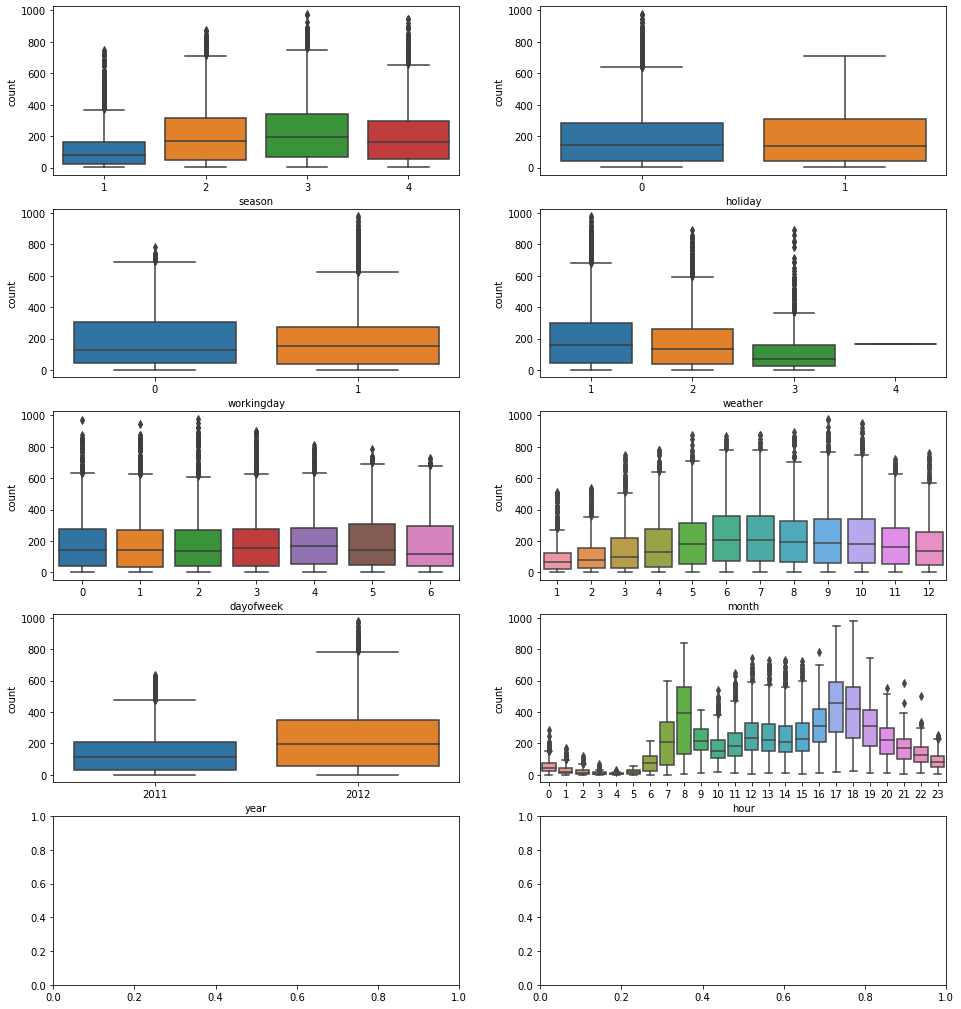

In [65]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize=(16, 18))

sns.boxplot(data = dfTrain, y="count", x = "season", orient = "v", ax = axes[0][0]) 
sns.boxplot(data = dfTrain, y="count", x = "holiday", orient = "v", ax = axes[0][1])
sns.boxplot(data = dfTrain, y="count", x = "workingday", orient = "v", ax = axes[1][0]) 
sns.boxplot(data = dfTrain, y="count", x = "weather", orient = "v", ax = axes[1][1]) 
sns.boxplot(data = dfTrain, y="count", x = "dayofweek", orient = "v", ax = axes[2][0]) 
sns.boxplot(data = dfTrain, y="count", x = "month", orient = "v", ax = axes[2][1])
sns.boxplot(data = dfTrain, y="count", x = "year", orient = "v", ax = axes[3][0]) 
sns.boxplot(data = dfTrain, y="count", x = "hour", orient = "v", ax = axes[3][1])

In [67]:
#엔트로피: 복잡도